================================================================================
# ANEXO

## PROBABLES MEJORAS A FUTURO        version 16 / 31-oct 03:58

### *Trabajo en curso*

1 Crear lista categorias = df_ventas_final["categoria"].unique()  

2 Crear tabla df_producto con id_producto, producto, id_categoria, categoria

Se observó que:
1. Las ventas contienen productos con la misma denominación, sin ninguna id como para identificarlos. Pertenecen a distintas ventas individuales y tienen distinto precio.

2. Por tal razón es dificil hacer una evaluación seria del resultado de la campaña publicitaria, porque corresponde a distintos productos agrupados, con precio sin adjudicar.

3. La campaña de marketing posee el costo publicitario por producto (generico/agregado) pero no hay como relacionarlo con el costo_unitario, ni con el precio_venta

4. Sacar un precio_promedio, no estoy seguro que sirva mucho, porque la venta podria haberse hecho a un valor menor que el precio_unitario_promedio, debido a la gran dispersión de precios

Hemos visto que para el producto "Adorno de pared", los precios estan distibuidos en 3 segmentos o rangos, la idea es hacer un promedio por rango y
luego renombrar los productos segun el rango, por ej:
"Adorno de pared" => "Adorno de pared R1"

De esta manera en lugar de tener 100 productos genericos los tendriamos divididos por rango de precios y con un nuevo nombre_producto que los represente
  


.  

## Por este motivo el DF df_producto, y df_pp_ventas van a ir evolucionando....  

.

In [14]:
import pandas as pd

# Import dataset ventas final
url = "https://raw.githubusercontent.com/alex-degarate/TT-2C2025-Data-Analitycs-Notebooks/main/PreEntrega/Datasets/"

#df_ventas_final = pd.read_csv( url + "ventas_final.csv")


In [ ]:
# Import dataset clientes
#df_clientes_final = pd.read_csv( url + "clientes_final.csv")

In [ ]:
# Import dataset marketing
df_marketing_final = pd.read_csv( url + "marketing_final.csv")

In [ ]:
df_marketing_final.info()


## a partir de ahora vamos a trabajar con df_pp_ventas2 / 4 (desde disco)

In [21]:
# a partir de ahora vamos a trabajar con df_pp_ventas2 /4

url2 ="https://raw.githubusercontent.com/alex-degarate/DAnalytics/main/preproyecto/Datasets/tempo/"
df_pp_ventas = pd.read_csv( url2 + "df_pp_ventas4.csv" )



In [23]:
## Hacemos una copia para hacer pruebas o si la IA lo arruina
df_pp_ventas2 = df_pp_ventas.copy()
df_pp_ventas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2998 non-null   int64  
 1   id_venta     2998 non-null   int64  
 2   id_producto  2998 non-null   int64  
 3   producto     2998 non-null   object 
 4   precio_unit  2998 non-null   float64
 5   cantidad     2998 non-null   int64  
 6   fecha_venta  2998 non-null   object 
 7   categoria    2998 non-null   object 
 8   rango        100 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 210.9+ KB


In [24]:
df_pp_ventas2.head()

,Unnamed: 0,id_venta,id_producto,producto,precio_unit,cantidad,fecha_venta,categoria,rango
0,0,792,0,Cuadro decorativo,69.94,5,2024-01-02,Decoración,NaN
1,1,811,0,Lámpara de mesa,105.10,5,2024-01-02,Decoración,NaN
2,2,1156,0,Secadora,97.96,3,2024-01-02,Electrodomésticos,NaN
3,3,1372,0,Heladera,114.35,8,2024-01-02,Electrodomésticos,NaN
4,4,1546,0,Secadora,106.21,4,2024-01-02,Electrodomésticos,NaN


## Lista alfabetica de productos

In [9]:

lista_productos = ["Adorno de pared","Alfombra","Aspiradora","Auriculares","Batidora","Cafetera","Candelabro",
"Consola de videojuegos","Cortinas","Cuadro decorativo","Cámara digital","Elementos de cerámica","Espejo decorativo","Freidora eléctrica","Heladera",
"Horno eléctrico","Jarrón decorativo","Laptop","Lavadora","Lámpara de mesa","Microondas","Parlantes Bluetooth","Plancha de vapor ","Proyector","Rincón de plantas","Secadora","SmartWatch","Smartphone","Tablet","Televisor"]

print(lista_productos)

print(len(lista_productos))


['Adorno de pared', 'Alfombra', 'Aspiradora', 'Auriculares', 'Batidora', 'Cafetera', 'Candelabro', 'Consola de videojuegos', 'Cortinas', 'Cuadro decorativo', 'Cámara digital', 'Elementos de cerámica', 'Espejo decorativo', 'Freidora eléctrica', 'Heladera', 'Horno eléctrico', 'Jarrón decorativo', 'Laptop', 'Lavadora', 'Lámpara de mesa', 'Microondas', 'Parlantes Bluetooth', 'Plancha de vapor ', 'Proyector', 'Rincón de plantas', 'Secadora', 'SmartWatch', 'Smartphone', 'Tablet', 'Televisor']
30


In [ ]:
#df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"].count()
# "producto"] == "Adorno de pared"] hay => 100
#df_pp_ventas.sort_values(by="producto", ascending=True, inplace=False)
#df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"]

# "Cuadro decorativo"] hay 100
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].count()
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].mean()

In [ ]:
#df_pp_ventas = df_pp_ventas.sort_values(by="producto", ascending=True)
#df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"].head(100)

#sort_values(by="valor_venta", ascending=False, inplace=True)
#df_pp_ventas.head()

# Utilizaremos el que esta en curso df_producto4 /2
Para hacer de enlace como clave primaria entre ventas y marketing


In [ ]:
# ventas_categoria.sort_values(by="valor_venta", ascending=False, inplace=True)
# mal df_pp_ventas[df_pp_ventas["producto"]].sum()

# IMPRIMIR la lista de productos ordenados alfabeticamente y las ventas
#----------------------------------------------------
# df_pp_ventas["producto"].value_counts().sort_index()
#---------------------------------------------------

,count
producto,
Adorno de pared,100
Alfombra,100
Aspiradora,100
Auriculares,143
Batidora,100
Cafetera,117
Candelabro,24
Consola de videojuegos,99
Cortinas,100


## El DF df_producto4 es el que esta actualizado y el que debe cargarse desde github

In [25]:
url2 ="https://raw.githubusercontent.com/alex-degarate/DAnalytics/main/preproyecto/Datasets/tempo/"

df_producto = pd.read_csv( url2 + "df_producto4.csv")


In [ ]:
# df_producto["prod_gener"] = df_producto["producto"]
# df_producto.head()
# df_producto.info()

### Aparecieron imprevistos que complican el codigo y  tengo que reintroducir el noombre generico del producto independiente del rango aque pertenezca.   
## Tanto a producto como  a pp_ventas

In [28]:
df_producto['prod_gener'] = df_producto['producto'].str.replace('-R[123]', '', regex=True)
display(df_producto.head())

,Unnamed: 0,id_producto,producto,id_categoria,categoria,rango,media_rango,precio_rango,prod_gener
0,0,101,Adorno de pared-R1,1,Decoración,R1,44.39,25-66,Adorno de pared
1,1,102,Adorno de pared-R2,1,Decoración,R2,78.29,66-91,Adorno de pared
2,2,103,Adorno de pared-R3,1,Decoración,R3,105.74,91-120,Adorno de pared
3,3,111,Alfombra-R1,1,Decoración,R1,0.00,NaN,Alfombra
4,4,112,Alfombra-R2,1,Decoración,R2,0.00,NaN,Alfombra


In [31]:
df_pp_ventas2["producto"] head(50) =

,Unnamed: 0,id_venta,id_producto,producto,precio_unit,cantidad,fecha_venta,categoria,rango
0,0,792,0,Cuadro decorativo,69.94,5,2024-01-02,Decoración,NaN
1,1,811,0,Lámpara de mesa,105.10,5,2024-01-02,Decoración,NaN
2,2,1156,0,Secadora,97.96,3,2024-01-02,Electrodomésticos,NaN
3,3,1372,0,Heladera,114.35,8,2024-01-02,Electrodomésticos,NaN
4,4,1546,0,Secadora,106.21,4,2024-01-02,Electrodomésticos,NaN
5,5,1697,0,Horno eléctrico,35.35,9,2024-01-02,Electrodomésticos,NaN
6,6,1710,0,Plancha de vapor,65.43,2,2024-01-02,Electrodomésticos,NaN
7,7,2959,0,Proyector,88.17,9,2024-01-02,Electrónica,NaN
8,8,318,0,Rincón de plantas,79.86,11,2024-01-03,Decoración,NaN
9,9,419,0,Candelabro,66.11,8,2024-01-03,Decoración,NaN


In [ ]:
'''
copio producto2 e. producto3 agregando los rangos
arango = ["","R1","R2","R3"]
nLenght2 = df_producto2.shape[0]

myid = 100
idx3 = 1

for index in range(nLenght2):

    idx = index
    # Select the row at index 0 from df_producto2
    row_to_copy = df_producto2.iloc[idx]
    #print(row_to_copy)

    nomP = df_producto2.iat[index, 1]
    idcat= df_producto2.iat[index, 2]
    catP = df_producto2.iat[index, 3]

    for j in range(1, 4):  # de 1-3
        # Append the selected row to df_producto3
        myid += 1
        df_producto3.loc[idx3] = [myid, nomP +'-'+ arango[j], idcat, catP, arango[j]]
        idx3 += 1
        #df_producto3 = pd.concat([df_producto3, pd.DataFrame([row_to_copy])], ignore_index=True)

    myid += 7

   '''

In [ ]:
'''
#df_producto4["precio_rango"] = ""
df_producto4.info()
prango = df_producto3.iat[4,5]
df_producto4.iat[2, 6] = prango

print(prango)
df_producto4.head()
'''

In [ ]:
# guardamos df_producto_4 para su uso posterior

def guardar_df_a_csv(df, nombre_archivo):
    df.to_csv(nombre_archivo, index=True)
    print(f"DataFrame guardado como {nombre_archivo}")

# Llamada a la función para guardar df_
# guardar_df_a_csv( df_producto4, 'df_producto5.csv')

# df_producto4.to_csv('df_producto4b.csv', index=True)
# df_pp_ventas.to_csv('df_pp_ventas4.csv', index=True)


## Intentar Copiar los campos [precio_rango] y [media_rango] desde
df_adorno_pared a df_producto3
Modificar la tabla producto para incorporar los campos ["precio_rango"], ["media_rango"], ["rango"]

=================================================================================================

# Cuadro decorativo

In [ ]:
# "Cuadro decorativo"] hay 100
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].count()
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].mean()

In [ ]:
#df_pp_ventas = df_pp_ventas.sort_values(by="producto", ascending=True)
#df_pp_ventas2[df_pp_ventas2["producto"] == "Cuadro decorativo"].head(100)


## Generamos la tabla [ df_cuadro_decorativo ]

In [33]:
# Drop the 'Unnamed: 0' column
if 'Unnamed: 0' in df_pp_ventas2.columns:
    df_pp_ventas2 = df_pp_ventas2.drop('Unnamed: 0', axis=1)

display(df_pp_ventas2.head())

,id_venta,id_producto,producto,precio_unit,cantidad,fecha_venta,categoria,rango
0,792,0,Cuadro decorativo,69.94,5,2024-01-02,Decoración,NaN
1,811,0,Lámpara de mesa,105.10,5,2024-01-02,Decoración,NaN
2,1156,0,Secadora,97.96,3,2024-01-02,Electrodomésticos,NaN
3,1372,0,Heladera,114.35,8,2024-01-02,Electrodomésticos,NaN
4,1546,0,Secadora,106.21,4,2024-01-02,Electrodomésticos,NaN


In [36]:
# Generamos una tabla aislada para el producto "Cuadro decorativo"
df_cuadro_decorativo2 = df_pp_ventas2[df_pp_ventas2["producto"] == "Cuadro decorativo"].copy()

media = df_cuadro_decorativo2["precio_unit"].mean()
print(f"El precio promedio para 'Cuadro decorativo' es: {media:.2f}")
df_cuadro_decorativo2.describe()

El precio promedio para 'Cuadro decorativo' es: 74.58


,id_venta,id_producto,precio_unit,cantidad
count,100.00000,100.0,100.000000,100.000000
mean,497.00000,0.0,74.578000,7.260000
std,290.11492,0.0,29.275527,3.395243
min,2.00000,0.0,26.200000,1.000000
25%,249.50000,0.0,51.262500,5.000000
50%,497.00000,0.0,75.125000,8.000000
75%,744.50000,0.0,101.342500,10.000000
max,992.00000,0.0,124.830000,12.000000


In [34]:

# Generamos una tabla aislada para el producto "Cuadro decorativo"
df_cuadro_decorativo = df_pp_ventas[df_pp_ventas["producto"] == "Cuadro decorativo"].copy()

media = df_cuadro_decorativo["precio_unit"].mean()
print(f"El precio promedio para 'Cuadro decorativo' es: {media:.2f}")
df_cuadro_decorativo.describe()

El precio promedio para 'Cuadro decorativo' es: 74.58


,Unnamed: 0,id_venta,id_producto,precio_unit,cantidad
count,100.000000,100.00000,100.0,100.000000,100.000000
mean,1463.350000,497.00000,0.0,74.578000,7.260000
std,904.479664,290.11492,0.0,29.275527,3.395243
min,0.000000,2.00000,0.0,26.200000,1.000000
25%,544.500000,249.50000,0.0,51.262500,5.000000
50%,1341.000000,497.00000,0.0,75.125000,8.000000
75%,2260.750000,744.50000,0.0,101.342500,10.000000
max,2960.000000,992.00000,0.0,124.830000,12.000000


In [ ]:
## Como vemos hay dispersion de precios

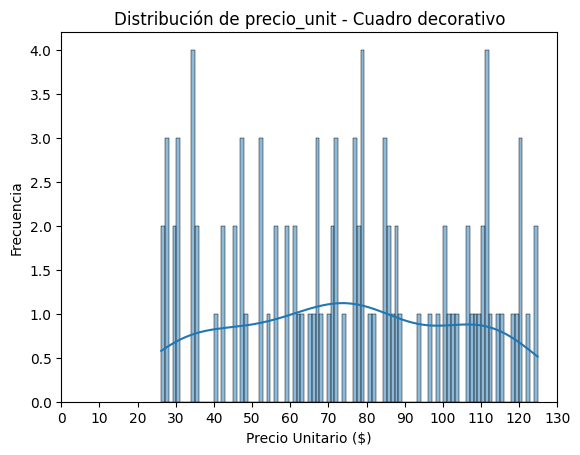

In [ ]:
# @title
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot( df_cuadro_decorativo["precio_unit"], bins=100, kde=True, edgecolor="black")
plt.title("Distribución de precio_unit - Cuadro decorativo")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Frecuencia")

# Seteamos x-axis ticks a intervalo s de 10
plt.xticks(np.arange(0, df_cuadro_decorativo ["precio_unit"].max() + 10, 10))

plt.show()

In [ ]:
# Calculamos percentilo 33 de 'precio_unit'
q33_precio_cuadro_decorativo = df_cuadro_decorativo["precio_unit"].quantile(0.33)

print(f"El percentilo 33 del precio para 'Cuadro decorativo' es: {q33_precio_cuadro_decorativo:.2f}")

# Calculamos el percentilo 66 de 'precio_unit'
q66_precio_cuadro_decorativo = df_cuadro_decorativo["precio_unit"].quantile(0.66)
print(f"El percentilo 66 del precio para 'Cuadro decorativo' es: {q66_precio_cuadro_decorativo:.2f}")

El percentilo 33 del precio para 'Cuadro decorativo' es: 60.92
El percentilo 66 del precio para 'Cuadro decorativo' es: 86.29


In [ ]:
# Definimos los bins (puntos de corte)
bins = [25, 61, 87, 130]

# Definimos las etiquetas para los rangos
labels = ['25-61', '61-87', '87-130']

# Creamos una nueva columna 'precio_range' para estratificar 'precio_unit' dentro de los cut-off
df_cuadro_decorativo['precio_range'] = pd.cut(df_cuadro_decorativo['precio_unit'], bins=bins, labels=labels, right=False)

# Mostramos la cantidad de items precios en cada rango de precios
display(df_cuadro_decorativo['precio_range'].value_counts())

# Display the first few rows with the new column
display(df_cuadro_decorativo.head(15))


,count
precio_range,
61-87,34
25-61,33
87-130,33


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_range
2907,112,Cuadro decorativo,96.66,9,2024-12-19,Decoración,87-130
1323,482,Cuadro decorativo,54.21,7,2024-05-31,Decoración,25-61
2918,222,Cuadro decorativo,84.64,1,2024-12-21,Decoración,61-87
1320,432,Cuadro decorativo,77.42,12,2024-05-30,Decoración,61-87
1981,412,Cuadro decorativo,67.79,9,2024-08-24,Decoración,61-87
1318,82,Cuadro decorativo,47.42,5,2024-05-30,Decoración,25-61
1036,202,Cuadro decorativo,106.72,4,2024-04-29,Decoración,87-130
2522,582,Cuadro decorativo,61.67,10,2024-11-01,Decoración,61-87
2256,562,Cuadro decorativo,29.72,3,2024-09-28,Decoración,25-61
1536,502,Cuadro decorativo,120.85,10,2024-06-29,Decoración,87-130


### Para la tabla df_cuadro_decorativo, en el campo [producto], renombramos la descripcion del producto

In [ ]:
 # Yo RENOMBRE la desc producto, pero tal vez seria mejor agregar un
# campo con la clasif x RANGO

# Observamos que hay 3 rangos de datos para Cuadro decorativo
# Calculamos esos rangos aproxim dividiendolos en terciles

r1_linf = 25
r1_lsup = 66
r2_linf = 66
r2_lsup = 91
r3_linf = 91
r3_lsup = 130

# Recorre la tabla sacada de ventas_final, para el producto "Cuadro decorativo"
nLenght = df_cuadro_decorativo.shape[0]
rango1 = [0, 0]
rango2 = [0, 0]
rango3 = [0, 0]

#        df_cuadro_decorativo.iat[ num_fila, num_col ]  con indice= 0
# print( df_cuadro_decorativo.iat[0, 2])

for i in range(nLenght):
    pu = df_cuadro_decorativo.iat[i, 2]

    nomP = df_cuadro_decorativo.iat[i, 1]
    if pu >= r1_linf and pu <= r1_lsup:
        rango1[0] += pu
        rango1[1] += 1
        df_cuadro_decorativo.iat[i, 1] = nomP + "-R1"

    elif pu > r2_linf and pu <= r2_lsup:
        rango2[0] += pu
        rango2[1] += 1
        df_cuadro_decorativo.iat[i, 1] = nomP + "-R2"

    elif pu > r3_linf and pu <= r3_lsup:
        rango3[0] += pu
        rango3[1] += 1
        df_cuadro_decorativo.iat[i, 1] = nomP + "-R3"

In [ ]:
# Calculamos las medias x rango
media_rango1 = round( rango1[0]/rango1[1], 2)
media_rango2 = round( rango2[0]/rango2[1], 2)
media_rango3 = round( rango3[0]/rango3[1], 2)

#Visualizamos las medias
print(f"media_rango1 : {media_rango1}")
print(f"media_rango2 : {media_rango2}")
print(f"media_rango3 : {media_rango3}")

# En las celdas de mas abajo lo graficamos

media_rango1 : 43.7
media_rango2 : 77.47
media_rango3 : 110.61


In [ ]:
df_cuadro_decorativo.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
2907,112,Cuadro decorativo-R3,96.66,9,2024-12-19,Decoración
1323,482,Cuadro decorativo-R1,54.21,7,2024-05-31,Decoración
2918,222,Cuadro decorativo-R2,84.64,1,2024-12-21,Decoración
1320,432,Cuadro decorativo-R2,77.42,12,2024-05-30,Decoración
1981,412,Cuadro decorativo-R2,67.79,9,2024-08-24,Decoración


In [ ]:
df_pp_ventas.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
1476,410,Adorno de pared,109.64,3,2024-06-21,Decoración
2426,620,Adorno de pared,92.16,4,2024-10-21,Decoración
697,780,Adorno de pared,79.13,7,2024-03-21,Decoración
255,50,Adorno de pared,83.10,5,2024-01-31,Decoración
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración


In [ ]:
#print( df_adorno_pared[df_adorno_pared["id_venta"]== 410])
#print( df_adorno_pared.iat[1:0])
df_adorno_pared.head()

In [ ]:
"""
# Save df_pp_ventas with the index
df_pp_ventas.to_csv('df_pp_ventas_with_index.csv', index=True)

# You can then read it back with the index
df_pp_ventas_loaded = pd.read_csv('df_pp_ventas_with_index.csv', index_col=0)
display(df_pp_ventas_loaded.head())
"""

In [ ]:
# Update df_pp_ventas with the modified rows from df_adorno_pared
df_pp_ventas.update(df_adorno_pared)

# Update df_pp_ventas with the modified rows from df_cuadro_decorativo
df_pp_ventas.update(df_cuadro_decorativo)

# Display the updated df_pp_ventas
display(df_pp_ventas.head())

In [ ]:
# Select the first row by index
first_row = df_adorno_pared.iloc[0]
display(first_row)

# Select a specific row by its integer index
# Replace 5 with the desired index
specific_row = df_adorno_pared.iloc[5]
display(specific_row)

,1476
id_venta,410
producto,Adorno de pared-R3
precio_unit,109.64
cantidad,3
fecha_venta,2024-06-21
categoria,Decoración
precio_range,91-120
media_rango,105.74


,1149
id_venta,410
producto,Adorno de pared-R3
precio_unit,93.62
cantidad,6
fecha_venta,2024-05-11
categoria,Decoración
precio_range,91-120
media_rango,105.74


In [ ]:
# Guardamos df_pp_ventas[]
df_pp_ventas.to_csv('df_pp_ventas.csv', index=False)

In [ ]:
# Guardamos df_producto[]
df_producto.to_csv('df_producto.csv', index=False)

In [ ]:
# Guardamos df_adorno_pared[]
df_adorno_pared.to_csv('df_adorno_pared.csv', index=False)

In [ ]:
# Guardamos df_cuadro_decorativo[]
df_cuadro_decorativo.to_csv('df_cuadro_decorativo.csv', index=False)

In [ ]:
# @title
'''
# Calculate the sum and count for each range using boolean indexing

rango1_data = df_adorno_pared[df_adorno_pared['precio_range'] == '25-66']
rango1_sum = rango1_data['precio_unit'].sum()
rango1_count = rango1_data.shape[0]

rango2_data = df_adorno_pared[df_adorno_pared['precio_range'] == '63-93']
rango2_sum = rango2_data['precio_unit'].sum()
rango2_count = rango2_data.shape[0]

rango3_data = df_adorno_pared[df_adorno_pared['precio_range'] == '93-120']
rango3_sum = rango3_data['precio_unit'].sum()
rango3_count = rango3_data.shape[0]


print(f"Range 25-66: Sum = {rango1_sum:.2f}, Count = {rango1_count}, Average = {(rango1_sum / rango1_count):.2f}")
print(f"Range 63-93: Sum = {rango2_sum:.2f}, Count = {rango2_count}, Average = {(rango2_sum / rango2_count):.2f}")
print(f"Range 93-120: Sum = {rango3_sum:.2f}, Count = {rango3_count}, Average = {(rango3_sum / rango3_count):.2f}")
'''


'\n# Calculate the sum and count for each range using boolean indexing\n\nrango1_data = df_adorno_pared[df_adorno_pared[\'precio_range\'] == \'25-66\']\nrango1_sum = rango1_data[\'precio_unit\'].sum()\nrango1_count = rango1_data.shape[0]\n\nrango2_data = df_adorno_pared[df_adorno_pared[\'precio_range\'] == \'63-93\']\nrango2_sum = rango2_data[\'precio_unit\'].sum()\nrango2_count = rango2_data.shape[0]\n\nrango3_data = df_adorno_pared[df_adorno_pared[\'precio_range\'] == \'93-120\']\nrango3_sum = rango3_data[\'precio_unit\'].sum()\nrango3_count = rango3_data.shape[0]\n\n\nprint(f"Range 25-66: Sum = {rango1_sum:.2f}, Count = {rango1_count}, Average = {(rango1_sum / rango1_count):.2f}")\nprint(f"Range 63-93: Sum = {rango2_sum:.2f}, Count = {rango2_count}, Average = {(rango2_sum / rango2_count):.2f}")\nprint(f"Range 93-120: Sum = {rango3_sum:.2f}, Count = {rango3_count}, Average = {(rango3_sum / rango3_count):.2f}")\n'

In [ ]:
# @title
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot
sns.kdeplot(df_adorno_pared["precio_unit"], fill=True)
plt.title("Kernel Density Estimate of Precio Unitario for Adorno de pared")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Density")
plt.show()
'''

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Create a KDE plot\nsns.kdeplot(df_adorno_pared["precio_unit"], fill=True)\nplt.title("Kernel Density Estimate of Precio Unitario for Adorno de pared")\nplt.xlabel("Precio Unitario ($)")\nplt.ylabel("Density")\nplt.show()\n'

In [ ]:
df_marketing.info()
df_marketing.head()

NameError: name 'df_marketing' is not defined

In [ ]:
df_marketing2 = df_marketing.sort_values(by="producto", ascending=True)
df_marketing2.info()
# df_canales = df_marketing.copy()
# df_canales.head()
df_marketing2.head(3)

In [ ]:
df_marketing2.to_csv('df_marketing2.csv', index=False)

In [ ]:
df_ventas_final.head()

In [ ]:
# Creamos DF con nombres productos unicos y sus categorias de df_ventas_final
df_producto = df_ventas_final[["producto", "categoria"]].drop_duplicates().reset_index(drop=True)

# Renombramos las columnas
df_producto.rename(columns={"producto": "prod_name", "categoria": "cat_name"}, inplace=True)

# ordenamos DF alfabeticamente por 'prod_name' en forma ascendente
df_producto = df_producto.sort_values(by="prod_name", ascending=True).reset_index(drop=True)

# Agregamos una column con los valores indices, ya ordenado producto
df_producto["prod_id"] = df_producto.index

# Crear una categoria'cat_id' numerica por cada categoria
df_producto["cat_id"] = df_producto["cat_name"].astype('category').cat.codes + 1

# Reordenamos columnas
df_producto = df_producto[["prod_id", "prod_name", "cat_id", "cat_name"]]

# Display the new DataFrame
display(df_producto.info())

In [ ]:
# Display the new DataFrame
display(df_producto.head(3))

In [ ]:
#df_ventas_final.to_csv('df_ventas_final.csv', index=False)
df_producto.to_csv('df_producto.csv', index=False)

In [ ]:
df_ventas_final.head()


In [ ]:
# @title
'''
# Merge df_ventas_final with df_producto to add the 'prod_id' column
df_ventas_final2 = pd.merge(df_ventas_final, df_producto[['prod_id', 'prod_name']], left_on='producto', right_on='prod_name', how='left')

# Drop the redundant 'prod_name' column from the merge
df_ventas_final2.drop('prod_name', axis=1, inplace=True)

# Display the updated DataFrame
display(df_ventas_final2.head())
'''

In [ ]:
# Agregar a df_ventas_final la columnas "prod_id" y cat_id
df_ventas_final = pd.merge(df_ventas_final, df_producto[['prod_id', 'prod_name', 'cat_id', 'cat_name']], left_on='producto', right_on='prod_name', how='left')

# Drop the redundant 'prod_name' and 'cat_name' columns from the merge
df_ventas_final.drop(['prod_name', 'cat_name'], axis=1, inplace=True)

# Display the updated DataFrame
display(df_ventas_final.head())

In [ ]:
df_ventas_final = df_ventas_final[[ "id_venta",	"prod_id", "producto","precio_unit", "cantidad",
                                   "fecha_venta", "cat_id","categoria", "valor_venta"]]
df_ventas_final.head()

In [ ]:
df_ventas_final.to_csv('df_ventas_final4.csv', index=False)